This notebook evaluates the lower bound implied by the GPP fluxes alone.

For related code, see
1. `../src/notebooks/gpp_file_explore_functional_creation.ipynb`
2. `../src/data/build_constraints.py`

We also show the lower bound improvements implied by the optimization procedure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in the computed constraint objects
with open('/Users/mikestanley/Research/Carbon_Flux/optimization/data/sign_corrected/A_diag.npy', 'rb') as f:
    A = np.load(f)
    
with open('/Users/mikestanley/Research/Carbon_Flux/optimization/data/sign_corrected/b_vec.npy', 'rb') as f:
    b = np.load(f)
    
print(A.shape)
print(b.shape)

(26496,)
(26496,)


In [3]:
# read in the unit-less functional vector
with open(
    '/Users/mikestanley/Research/Carbon_Flux/optimization/data/na_june_functional_no_control.npy', 'rb'
) as f:
    h_no_control = np.load(f)
    
print(h_no_control.shape)

(26496,)


In [4]:
# look at the lower bound -- NOTE this is the NEGATIVE of the GPP
GPP_NA = -np.dot(h_no_control, b)
print(GPP_NA)

-4.624416554554736


In [5]:
# percent improvement by optimizations -- both number are from output_investigation_08.ipynb
DUAL_LEP = -3.4492964972046596
PRIMAL_LEP = -2.478 

print(f'LEP DUAL Percent Improvement  : {(DUAL_LEP - GPP_NA) / GPP_NA * 100:.2f}%')
print(f'LEP PRIMAL Percent Improvement: {(PRIMAL_LEP - GPP_NA) / GPP_NA * 100:.2f}%')

LEP DUAL Percent Improvement  : -25.41%
LEP PRIMAL Percent Improvement: -46.41%


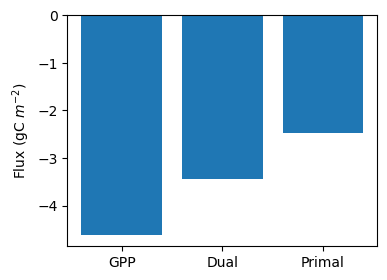

In [13]:
plt.figure(figsize=(4, 3))
plt.bar(x=np.arange(3), height=[GPP_NA, DUAL_LEP, PRIMAL_LEP])
plt.xticks(ticks=np.arange(3), labels=['GPP', 'Dual', 'Primal'])
plt.ylabel('Flux (gC $m^{-2}$)')
plt.show()